# 서울시 자치구별 CCTV 현황 분석하기
- 최종 분석 결과
    - x 축: 인구 규모
    - y 축: CCTV 설치 규모
    - 산점도: 점 위치 (자치구 위상)
    - 추세선: 인구에 비례하는 CCTV 설치 규모
    - 오차: 점 색상
    
![ch01_chart](https://user-images.githubusercontent.com/10287629/77377172-b3b96000-6db5-11ea-98e1-faca7442a3a4.png)
- 분석 개요
    - 서울시 각 자치구별 CCTV수를 파악하고, 인구대비 CCTV 비율을 파악해서 순위 비교
    - 인구 대비 CCTV의 평균치를 확인하고 그로부터 CCTV가 과하거나 또는 부족한 자치구를 확인
- 학습 개요
    - Jupyter Notebook 사용환경을 익히고 Python 기본 문법을 확인
    - Pandas와 Matplotlib의 기본적 사용법을 확인
    - 단순한 그래프 표현에서 한 단계 더 나아가 경향성을 확인하고 시각화를 통한 스토리-텔링
- [Numpy](https://docs.scipy.org/doc/numpy-1.15.1/reference/) 소개
    - 고성능의 수치계산을 위해, C 언어로 구현된 파이썬 라이브러리
    - Numerical Python의 줄임말
    - 벡터 및 행렬 연산의 매우 편리한 기능을 제공
    - 데이터 분석 라이브러리인 pandas 및 matplotlib의 기반으로 사용됨
    - 기본적으로 array(행렬) 단위로 데이터를 관리
    - [Numpy Reference](https://docs.scipy.org/doc/numpy-1.15.1/reference/)
- [Pandas](https://namu.wiki/w/pandas) 소개
    - 데이터 분석 및 조작을 위한 소프트웨어 라이브러리
    - 3조항 BSD 라이선스 조건(자유로운 개작, 수정 및 무제한 배포) 하에서 무료로 사용 가능
    - 판다스의 이름은 계량 경제학에서 사용되는 용어인 'PANel DAta'의 앞 글자를 따서 지어졌음(실제 동물인 판다와는 아무런 관련이 없음)
    - R의 data.frame 구조를 본뜬 DataFrame 구조를 사용
    - 데이터 분석을 파이썬으로 입문하는 사람들의 필수적 라이브러리
    - [Pandas 기본 사용법 익히기, DANDYRILLA, 170812](https://dandyrilla.github.io/2017-08-12/pandas-10min/)
    - [판다스 공식 사이트](https://pandas.pydata.org/)
    - [scipy.org](https://docs.scipy.org/doc/)
    - [나무위키 넘파이](https://namu.wiki/w/NumPy)
- [Matplotlib](https://datascienceschool.net/view-notebook/d0b1637803754bb083b5722c9f2209d0/) 소개
    - 파이썬에서 자료를 차트(chart)나 플롯(plot)으로 시각화(visulaization)하는 패키지
    - [갤러리](https://matplotlib.org/gallery.html)
    - 차트 유형
        - 라인 플롯(line plot)
        - 스캐터 플롯(scatter plot)
        - 컨투어 플롯(contour plot)
        - 서피스 플롯(surface plot)
        - 바 차트(bar chart)
        - 히스토그램(histogram)
        - 박스 플롯(box plot)
    - [matplotlib.org](https://matplotlib.org/)

- 목차
    0. 웹에서 자료 구하기
    1. 서울시 CCTV 자료 - csv 파일 읽기
    2. 서울시 인구 자료- 엑셀 xls 파일 읽기  
    (3. Pandas 기초)
    4. CCTV 데이터 파악하기
    5. 서울시 인구 데이터 파악하기  
    (6. Pandas 고급 두 DataFrame 병합하기)
    7. CCTV 데이터와 인구 데이터 합쳐서 분석하기  
    (8. 그래프 그리기 기초 - matplotlib)
    9. CCTV와 인구현황 그래프로 분석하기
    10. 마무리 작업


원문: [민형기](http://pinkwink.kr), 파이썬으로 데이터 주무르기, 비제이퍼블릭, 2017.


## 웹에서 자료 구하기

- 서울시 CCTV 현황
    - '서울시 자치구 연도별 CCTV 설치 현황' 구글링
    - https://data.seoul.go.kr/dataList/OA-2734/C/1/datasetView.do
    - 과거에는 csv 파일로 제공되었으나, 현재는 2018년도까지 집계된 xlsx 파일로 제공됨
    - 수업에서는 2016년도까지 집계된 [csv 파일](./CCTV_in_Seoul.csv)로 진행함
- 서울시 인구 현황
    - '서울시 서울통계' 구글링
    - https://data.seoul.go.kr/dataService/boardList.do#submenu99
    - 과거에는 xls 파일로 제공되었으나, 현재는 2020년 2/4분기까지 집계한 (탭으로 구분된) txt 파일로 제공됨 
           -> 구분자가 ,가 아닌 탭으로 설정되어야 함
    - 다양한 서울시 인구 자료 제공됨
    - 다양한 파일 형식으로 제공됨
    - 수업에서는 2017년 1/4분기 기준으로 집계된 [xls 파일](./population_in_Seoul.xls)로 진행함 

## 서울시 CCTV 자료 - csv 파일 읽기

In [1]:
# 패키지 설치 (노트북 셀에서 실행하려면 명령 앞에 '!' 문자를 붙여줌)
!conda install pandas
!conda install numpy
!conda install matplotlib
!conda install xlrd
# 이런 식으로 노트북 셀에서 직접 설치할 수도 있으나, 아나콘다 파워 쉘 프롬프트에서 설치하기를 권장함

In [2]:
import pandas as pd

In [3]:
# read_csv(): csv 파일 읽기
# 현재 파일과 같은 폴더에 CCTV_in_Seoul.csv가 존재해야 함, 인코딩 utf-8
CCTV_Seoul = pd.read_csv('CCTV_in_Seoul.csv',  encoding='utf-8')
CCTV_Seoul.head()   # head(): 자료의 앞 부분만 검토하는 용도

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [4]:
CCTV_Seoul.columns  # 열 정보 확인하면 Index(리스트) 형태임

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [5]:
CCTV_Seoul.columns[0]  # 0번 열 확인

'기관명'

In [6]:
# 열 이름 변경
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]: '자치구'}, inplace=True)  # inplace 옵션으로 원본을 직접 수정
CCTV_Seoul.head()

,자치구,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


## 서울시 인구 자료- 엑셀 xls 파일 읽기

- [Pandas API reference](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)
- xlsx 파일도 xls 파일과 동일한 방식으로 read_excel() 메소드로 처리 가능함

In [7]:
# read_excel(): xls 파일 읽기
pop_Seoul = pd.read_excel('./population_in_Seoul.xls')   # './' 생략 가능. 현재 폴더 안에 있다는 뜻
pop_Seoul.head()
# 선두 2행(0행, 1행)은 중복된 헤더로서 필요 없음
# B(자치구), D(전체 인구), G(한국인 수), J(외국인 수), N(고령자 수) 열만 필요함 -> 필요 없는 열은 빼고 선택적으로 읽어들임

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [8]:
# 옵션 변경하여 다시 읽기
pop_Seoul = pd.read_excel('population_in_Seoul.xls',
                          header = 2,  # 앞의 행은 무시하고 2번 행을 헤더로 지정
                                       # (열 포함 0부터 시작하는 번호로 위의 표 상으로는 1번 행을 의미)
                          usecols = 'B, D, G, J, N')  # 지정 열만 읽어들이도록 제한

pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [9]:
# 열 이름 변경
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '자치구',  # 자치구 명
                          pop_Seoul.columns[1] : '인구수',  # 자치구 당 전체 인구 수
                          pop_Seoul.columns[2] : '한국인',  # 자치구 당 한국인 인구 수 
                          pop_Seoul.columns[3] : '외국인',  # 자치구 당 외국인 인구 수 
                          pop_Seoul.columns[4] : '고령자'}, inplace=True)  # 자치구 당 65세 이상 고령자 인구 수
pop_Seoul.head()




,자치구,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


## CCTV 데이터 파악하기

In [10]:
CCTV_Seoul.shape  # 데이터 파악하기 25행 6열 형태

(25, 6)

In [11]:
CCTV_Seoul.describe()

,소계,2013년도 이전,2014년,2015년,2016년
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1179.080000,764.760000,159.480000,205.200000,385.880000
std,556.728983,415.510257,104.132976,137.877059,182.479981
min,485.000000,238.000000,21.000000,30.000000,81.000000
25%,748.000000,464.000000,78.000000,103.000000,292.000000
50%,1015.000000,573.000000,142.000000,184.000000,377.000000
75%,1496.000000,1070.000000,218.000000,269.000000,467.000000
max,2780.000000,1843.000000,430.000000,584.000000,932.000000


In [12]:
CCTV_Seoul.sample(3)  # 임의로 샘플 3개 출력

,자치구,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
5,광진구,707,573,78,53,174
23,중구,671,413,190,72,348


In [13]:
# 소계 하위 5개 구
CCTV_Seoul.sort_values(by='소계', ascending=True).head(5)  # 'by=' 생략 가능, ascending=True은 오름차순

,자치구,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [14]:
# 소계 상위 5개 구
CCTV_Seoul.sort_values('소계', ascending=False).head(5)  # ascending=False는 내림차순

,자치구,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [15]:
# 최근 3개년도 증가율 계산 및 열 삽입
분자 = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + CCTV_Seoul['2014년'])
분모 = CCTV_Seoul['2013년도 이전']
CCTV_Seoul['최근증가율'] = 분자 / 분모 * 100
# CCTV_Seoul['최근증가율'] = \
#     (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + CCTV_Seoul['2014년']) \
#     / \
#     CCTV_Seoul['2013년도 이전'] * 100

In [16]:
# 최근 3개년도 증가율 상위 10개 구
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(10)

,자치구,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765
19,영등포구,904,495,214,195,373,157.979798
0,강남구,2780,1292,430,584,932,150.619195
4,관악구,1496,846,260,390,613,149.290780
23,중구,671,413,190,72,348,147.699758
11,동작구,1091,544,341,103,314,139.338235


In [17]:
# 최근 3개년도 증가율 하위 10개 구
CCTV_Seoul.sort_values(by='최근증가율', ascending=True).head(10)

,자치구,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
18,양천구,2034,1843,142,30,467,34.671731
13,서대문구,962,844,50,68,292,48.578199
20,용산구,1624,1368,218,112,398,53.216374
5,광진구,707,573,78,53,174,53.228621
14,서초구,1930,1406,157,336,398,63.371266
16,성북구,1464,1009,78,360,204,63.627354
6,구로구,1561,1142,173,246,323,64.973730
10,동대문구,1294,1070,23,198,579,74.766355
24,중랑구,660,509,121,177,109,79.960707
15,성동구,1062,730,91,241,265,81.780822


## 서울시 인구 데이터 파악하기

In [18]:
pop_Seoul.describe()  # 자치구는 25개인데 왜 26개로 뜨는가?

,인구수,한국인,외국인,고령자
count,2.600000e+01,2.600000e+01,26.000000,2.600000e+01
mean,7.844311e+05,7.636129e+05,20818.153846,1.016506e+05
std,1.924156e+06,1.873421e+06,51598.169516,2.491801e+05
min,1.332400e+05,1.243120e+05,2017.000000,2.076400e+04
25%,3.348055e+05,3.316718e+05,4489.000000,4.831200e+04
50%,4.135115e+05,4.051690e+05,9079.500000,5.439750e+04
75%,4.907855e+05,4.864445e+05,14901.500000,6.431075e+04
max,1.019760e+07,9.926968e+06,270636.000000,1.321458e+06


In [19]:
pop_Seoul.head()  # 0번 행에 합계 행이 포함되어 있기 때문!!!

,자치구,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [20]:
# 0번 행(합계 행) 삭제, inplace=True로 줘서 원본도 변경
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,자치구,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [21]:
# '자치구' 열 값을 중복없이 출력
n = pop_Seoul['자치구'].nunique()
print(f'자치구 개수: {n} 개 (NaN은 값을 카운트할 때 제외됨!, 아래에서 헤아려 보면 NaN까지 26 개)')
pop_Seoul['자치구'].unique()  # nan 값이 존재하기 때문에 26개!!!

자치구 개수: 25 개 (NaN은 값을 카운트할 때 제외됨!, 아래에서 헤아려 보면 NaN까지 26 개)


array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [22]:
# 자치구에 nan 값이 들어있는 행을 isnull()로 검색해서 확인하니, 행 번호가 26
pop_Seoul[pop_Seoul['자치구'].isnull()]

,자치구,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [23]:
# dropna()로 nan값이 들어있는 행(26번 행)을 삭제
pop_Seoul.dropna(inplace=True)
pop_Seoul['자치구'].unique()   # nan 값이 지워지고, 자치구 25개 확인

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [24]:
pop_Seoul.sample(3)  # '인구수'는 총 인구 수

,자치구,인구수,한국인,외국인,고령자
8,성북구,461260.0,449773.0,11487.0,64692.0
12,은평구,494388.0,489943.0,4445.0,72334.0
21,관악구,525515.0,507203.0,18312.0,68082.0


In [25]:
# '외국인비율' 및 '고령자비율' 열 계산 및 추가
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.sample(3)

,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255


In [26]:
# '인구수' 열 상위 5개 구 확인
pop_Seoul.sort_values(by='인구수', ascending=False).head(5)

,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [27]:
# '외국인' 열 상위 5개 구 확인
pop_Seoul.sort_values(by='외국인', ascending=False).head(5)

,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [28]:
# '외국인비율' 상위 5개 구 확인
pop_Seoul.sort_values(by='외국인비율', ascending=False).head(5)

,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [29]:
# '고령자' 열 상위 5개 구 확인
pop_Seoul.sort_values(by='고령자', ascending=False).head(5)

,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [30]:
# '고령자비율' 열 상위 5개 구 확인
pop_Seoul.sort_values(by='고령자비율', ascending=False).head(5)


,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


## CCTV 데이터와 인구 데이터 합쳐서 분석하기

In [31]:
CCTV_Seoul.head()  # CCTV 데이터

,자치구,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [32]:
pop_Seoul.head()  # 인구 데이터

,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [33]:
# '자치구' 열을 key 열로 활용하여 merge 함, how는 outer 조인하여 양 쪽에 대응되는 데이터가 아니라고 일단 가져옴
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='자치구', how='outer')  # CCTV_Seoul과 pop_Seoul 두 데이터프레임을 합침
data_result.head()

,자치구,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


NaN 값 포함 여부 검사
- 특정 열을 대상으로 검사

```
df['your column name'].isnull().values.any()  # True/False
df['your column name'].isnull().sum()         # 개수
```
- 전체 열을 대상으로 검사

```
df.isnull().values.any()  # True/False
df.isnull().sum()         # 개수
```

In [34]:
# 데이터프레임 전체에 NaN 값이 포함되어 있는지 검사
data_result.isnull().values.any()

False

In [35]:
data_result['자치구'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [36]:
# '소계' 및 '최근증가율' 열만 남기고, 연도별 CCTV 데이터 열을 삭제
del data_result['2013년도 이전']  # 해당 열들을 삭제
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()
# 행 삭제는 drop, 열 삭제는 del

,자치구,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [37]:
# '자치구' 열을 인덱스로 설정 (행 번호 열이 사라짐)
data_result.set_index('자치구', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [38]:
data_result.rename(
    columns={data_result.columns[0]: 'CCTV 소계', data_result.columns[1]: 'CCTV 증가율'}, 
    inplace=True)
data_result.head()

,CCTV 소계,CCTV 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


- (고령자비율, 외국인비율, 인구수) 중에서 CCTV 소계와 관련성이 큰 항목은?
- 상관계수(correlation coefficient)
    - 상관계수 절대값이 클수록 강한 상관관계
        - 상관계수 절대값이 0.1 이하: 거의 무관함
        - 상관계수 절대값이 0.3 이하: 약한 상관관계
        - 상관계수 절대값이 0.7 이상: 뚜렷한 상관관계
        
     상관관계 구하는 법 2가지
    - `numpy.corrcoef(df['x'], df['y'])`
        - 결과값을 행렬로 산출
        - 주 대각선을 기준으로 대칭인 행렬
        - 주 대각선 이외의 값에 주목
    - `df['x'].corr(df['y'])`
    - 상관관계 해석
        - 고령자비율 대 CCTV 소계는 약한 음의 상관관계
        - 외국인비율 대 CCTV 소계는 거의 무관
        - 인구수 대 CCTV 소계는 약한 양의 상관관계

In [39]:
import numpy as np
np.corrcoef(data_result['고령자비율'],data_result['CCTV 소계'])
# 대각선으로 왼쪽 위와 오른쪽 아래는 늘 1 이 나오며, 오른쪽 위와 왼쪽 아래는 늘 대칭을 이루기 때문에 둘 중에 하나만 보면 됨

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [40]:
np.corrcoef(data_result['외국인비율'],data_result['CCTV 소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [41]:
np.corrcoef(data_result['인구수'],data_result['CCTV 소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

- 인구수와 CCTV 소계의 관계에 집중해서 분석

In [42]:
# 소계 역순으로 정렬
data_result.sort_values(by='CCTV 소계', ascending=False).head(5)

,CCTV 소계,CCTV 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [43]:
# 인구수 역순으로 정렬
data_result.sort_values(by='인구수', ascending=False).head(5)

,CCTV 소계,CCTV 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


## CCTV와 인구현황 그래프로 분석하기

### 준비

In [44]:
data_result.head()  # 정리했던 데이터 확인

,CCTV 소계,CCTV 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [45]:
import matplotlib.pyplot as plt  # 그림을 그릴 때 필요한 라이브러리
# %matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 지정한다는 의미인데, 지워도 별 문제 없음

- [Matplotlib에서 한글 폰트 사용하기](https://programmers.co.kr/learn/courses/21/lessons/950)

In [46]:
import platform

# rc(runtime configuration)를 사전 형태로 저장한 rcParams
from matplotlib import font_manager, rc
# '-' 표시를 unicode minus 문자(True)로 할지, 아니면 ASCII hyphen 문자(False)로 할지
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':        # MAC OS X
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':     # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

### CCTV 규모 시각화

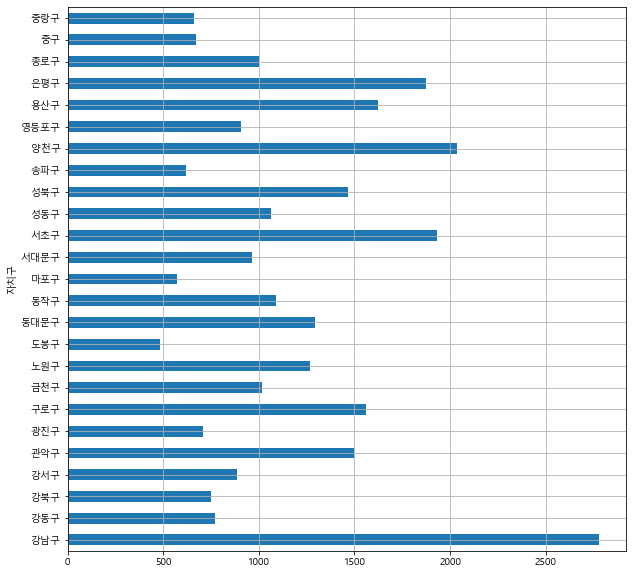

In [47]:
# CCTV 소계 수평 막대 그래프 (not sorted)
plt.figure()

# 정리했던 데이터 뒤에 plot() 함수 적용하여 차트 작성
# 'barh': 수평 막대, 'bar': 수직 막대
data_result['CCTV 소계'].plot(kind='barh', grid=True, figsize=(10, 10))

plt.show()  # 자치구 열을 인덱스 열로 변경한 이유가 짐작이 되는지?

- 위 차트는 정렬되지 않은 상태라 해석이 어려움
- 축 제목 및 단위가 누락됨

### 정렬하여 시각화

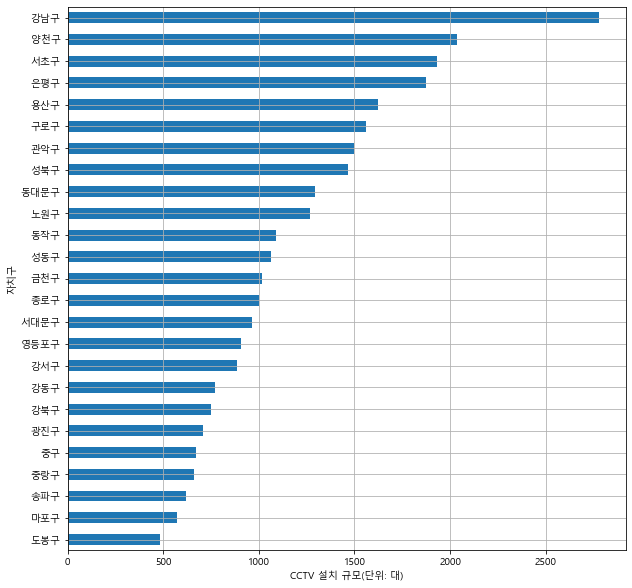

In [48]:
# CCTV 소계 정렬하여 수평 막대 그래프
data_result['CCTV 소계'] \
    .sort_values(ascending=True) \
    .plot(kind='barh', grid=True, figsize=(10, 10))
plt.xlabel('CCTV 설치 규모(단위: 대)')
plt.show()

- 정렬의 위력
    - 엄청난 강남
    - 만만하지 않은 양천, 서초, 은평
    - 하위권: 도봉, 마포, 송파
    - 강남구는 도봉구의 5배가 넘는다는...
- 오름차순 정렬?
- 인구 대비 분석의 필요성

### CCTV 비율 시각화

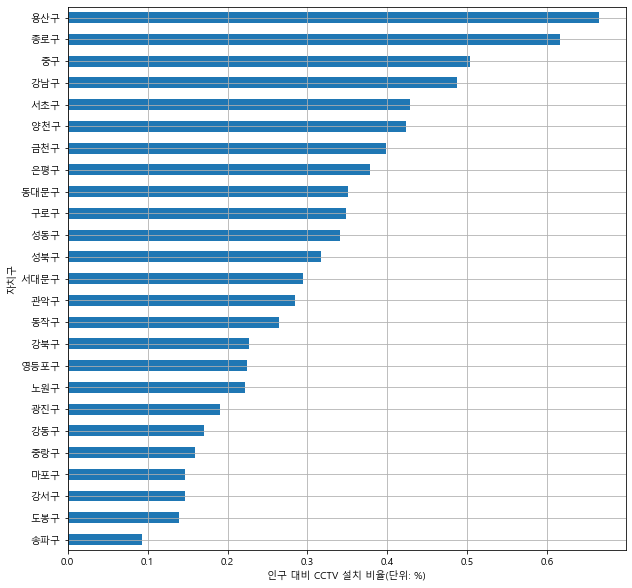

In [49]:
# 인구 대비 CCTV 비율 계산
data_result['CCTV 비율'] = data_result['CCTV 소계'] / data_result['인구수'] * 100  # 100명 당 CCTV가 몇 대 인지

data_result['CCTV 비율'] \
    .sort_values(ascending=True) \
    .plot(kind='barh', grid=True, figsize=(10, 10))
plt.xlabel('인구 대비 CCTV 설치 비율(단위: %)')
plt.show()

- 인구 대비 분석
    - 용산구 및 종로구가 압도적
    - 하위권: 송파, 도봉 (절대 수량 및 상대 수량 모두 하위권)
    - 하락: 강남구( 1위 -> 4위), 양천구(2위 -> 6위) 
    - 상승: 종로구(14위 -> 2위), 용산구(5위 -> 1위)
- 산점도(scatter diagram): matplot.pyplot.scatter()

### subplot 활용 시각화

In [50]:
# 원본 정렬
data_result.sort_values(by='CCTV 비율', ascending=True, inplace=True)

#### df.plot()으로 시각화

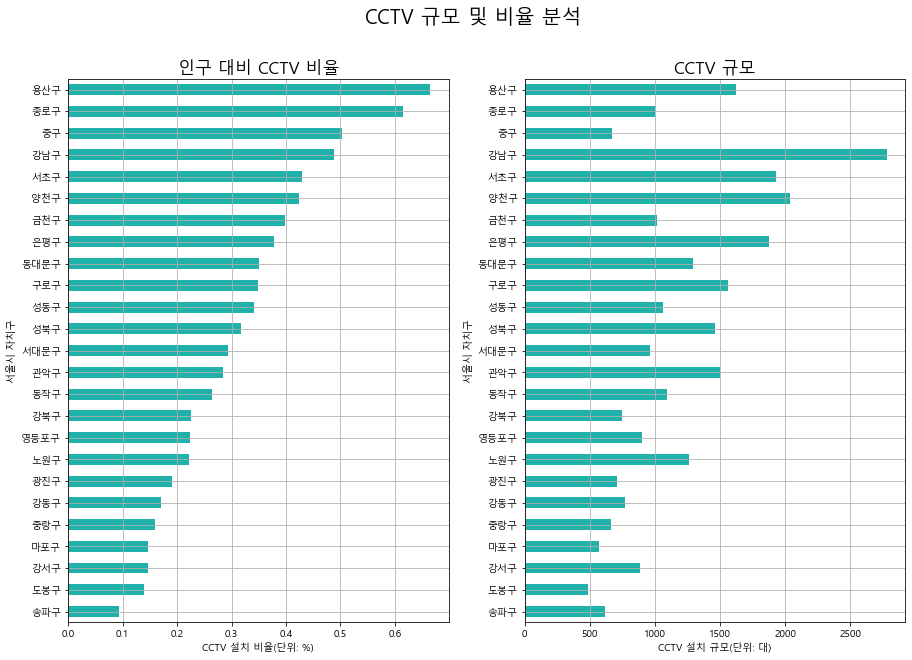

In [51]:
# df.plot()으로 subplot 작성

fig = plt.figure(figsize=(15,10))  # figsize: 그림 사이즈 지정
fig.suptitle('CCTV 규모 및 비율 분석', fontsize=20)

# 그림 왼쪽에 CCTV 비율 시각화
ax1 = fig.add_subplot(121)  # 1행 2열 중에 1번째 차트 (차트 하나를 각각 1열로 생각)
ax1.set_title('인구 대비 CCTV 비율', fontsize=17)  # 차트 제목 지정
data_result['CCTV 비율'] \
    .plot(kind='barh', grid=True, color='lightseagreen')
plt.xlabel('CCTV 설치 비율(단위: %)')
plt.ylabel('서울시 자치구')  

# 그림 오른쪽에 CCTV 규모 시각화
ax2 = fig.add_subplot(122)  # 1행 2열 중에 2번째 차트
ax2.set_title('CCTV 규모', fontsize=17)
data_result['CCTV 소계'] \
    .plot(kind='barh', grid=True, color='lightseagreen')
plt.xlabel('CCTV 설치 규모(단위: 대)')
plt.ylabel('서울시 자치구')  

plt.show()

#### plt.barh()로 시각화

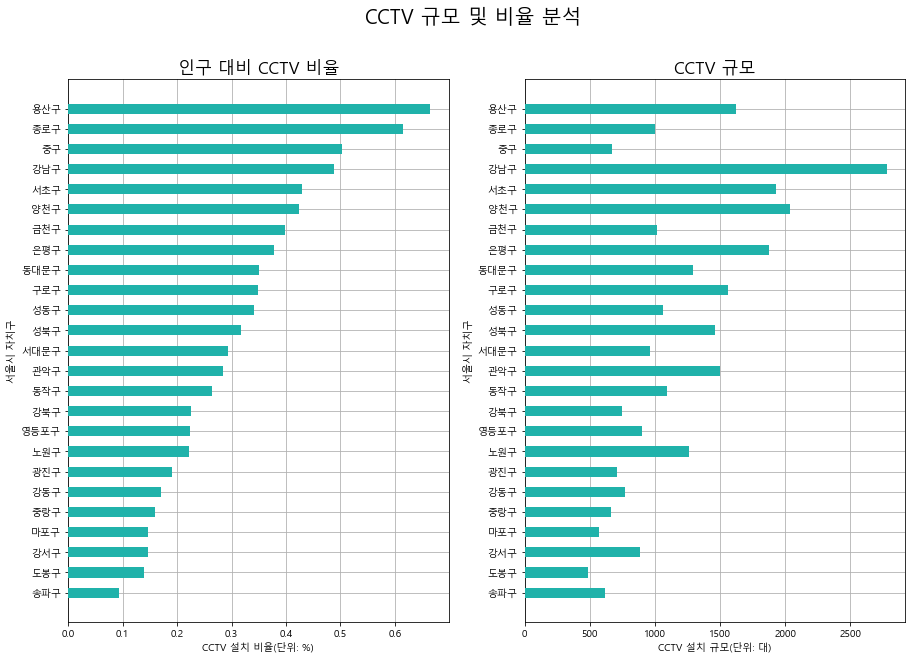

In [52]:
# plt.barh()로 subplot 작성
# 차트 안의 맨 위와 맨 아래 부분에 여유 공간이 생긴다.

fig = plt.figure(figsize=(15,10))
fig.suptitle('CCTV 규모 및 비율 분석', fontsize=20)

ax1 = fig.add_subplot(121)
ax1.set_title('인구 대비 CCTV 비율', fontsize=17)
ax1.grid(zorder=0)
plt.barh(y=data_result.index, width=data_result['CCTV 비율'], 
         height=0.5, zorder=3, color='lightseagreen')
plt.xlabel('CCTV 설치 비율(단위: %)')
plt.ylabel('서울시 자치구')

ax2 = fig.add_subplot(122)
ax2.set_title('CCTV 규모', fontsize=17)
ax2.grid(zorder=0)
plt.barh(y=data_result.index, width=data_result['CCTV 소계'], 
         height=0.5, zorder=3, color='lightseagreen')
plt.xlabel('CCTV 설치 규모(단위: 대)')
plt.ylabel('서울시 자치구')

plt.show()

### 인구-CCTV 산점도 시각화

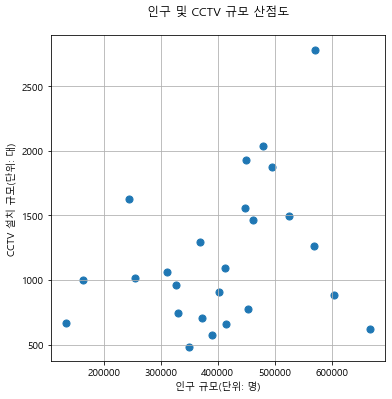

In [53]:
# 인구 대비 CCTV 설치 수량으로 산점도 
plt.figure(figsize=(6, 6))
plt.scatter(data_result['인구수'],      # x 좌표 
            data_result['CCTV 소계'],   # y 좌표 
            s=50)                       # 점 크기
plt.title('인구 및 CCTV 규모 산점도\n')
plt.xlabel('인구 규모(단위: 명)')
plt.ylabel('CCTV 설치 규모(단위: 대)')
plt.grid()
plt.show()

### 회귀식 가시화

- 인구 규모와 CCTV 설치 수량 사이에 양의 상관관계가 존재한다고 했으므로 ...
- 다항식 최소제곱 근사법으로 직선형 추세선을 추정
    - https://darkpgmr.tistory.com/56
    - http://www.aistudy.com/math/least_atkinson.htm
    - 추세선: numpy.polyfit()
    - x 축: numpy.linspace()
    - y 축: numpy.poly1d()

In [54]:
# numpy.polyfit(x, y, 차수)
pf = np.polyfit(data_result['인구수'],       # 추정에 사용할 x 좌표 값
                data_result['CCTV 소계'],    # 추정에 사용할 y 좌표 값
                1)                           # 1차원(직선 형태) 다항식
pf

array([1.30916415e-03, 6.45066497e+02])

- 위 결과에서 앞 부분은 a(기울기), 뒷 부부은 b(y축의 절편)을 의미
- 위 추정 결과의 해석
    - 차수를 1로 지정했으므로, 1차 다항식 y = ax + b 형태로 추정
    - 추정 결과: array([a, b])
- 추정 결과의 적용
    - numpy.poly1d( array([a, b]) )로 다항식 클래스 ax +b 생성하여 y 값을 계산 

In [55]:
# y 축
fy = np.poly1d(pf)                    
fy

poly1d([1.30916415e-03, 6.45066497e+02])

- poly1d(pf)로 추정한 다항식은 poly1d([a, b]) = ax + b
- 지금까지 y 축 값에 대한 추정식을 찾았음
- 이제 x 축에 대한 값의 범위를 지정
    - numpy.linspace(시작값, 끝값(포함), 개수) 
    - linspace()는 선형 구간 배열 생성, logspace()는 로그 구간 배열 생성

In [56]:
# x 축
fx = np.linspace(100000, 700000, 100)  # 10만~70만 사이의 범위를 100개 구간으로 나누어서 x값을 정하라는 뜻
# fx = np.linspace(0, 700000, 100)  
fx

array([100000.        , 106060.60606061, 112121.21212121, 118181.81818182,
       124242.42424242, 130303.03030303, 136363.63636364, 142424.24242424,
       148484.84848485, 154545.45454545, 160606.06060606, 166666.66666667,
       172727.27272727, 178787.87878788, 184848.48484848, 190909.09090909,
       196969.6969697 , 203030.3030303 , 209090.90909091, 215151.51515152,
       221212.12121212, 227272.72727273, 233333.33333333, 239393.93939394,
       245454.54545455, 251515.15151515, 257575.75757576, 263636.36363636,
       269696.96969697, 275757.57575758, 281818.18181818, 287878.78787879,
       293939.39393939, 300000.        , 306060.60606061, 312121.21212121,
       318181.81818182, 324242.42424242, 330303.03030303, 336363.63636364,
       342424.24242424, 348484.84848485, 354545.45454545, 360606.06060606,
       366666.66666667, 372727.27272727, 378787.87878788, 384848.48484848,
       390909.09090909, 396969.6969697 , 403030.3030303 , 409090.90909091,
       415151.51515152, 4

- 위 결과를 보면 x 축에 사용할 값을 시작값부터 끝값 범위에서 100개 생성하여 배열로 생성하였음
- 이제 추정선을 플롯

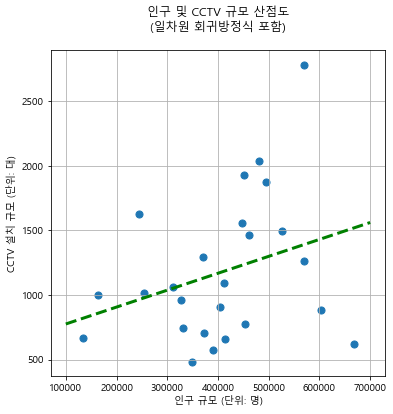

In [57]:
plt.figure(figsize=(6, 6))
plt.scatter(data_result['인구수'], data_result['CCTV 소계'], s=50)  # 산점도 플롯(s=size)
plt.plot(fx, fy(fx), ls='dashed', lw=3, color='g')                  # 추정선 플롯
# fy(fx) -> fx를 fy에 적용시킨 값으로 차트를 그리겠단 뜻
# ls='dashed' -> line style(라인 형태)을 dashed로 지정, lw=3 -> line width(라인의 두께)는 3 정도 (1로 하면 더 얇아짐)
plt.title('인구 및 CCTV 규모 산점도\n(일차원 회귀방정식 포함)\n')
plt.xlabel('인구 규모 (단위: 명)')
plt.ylabel('CCTV 설치 규모 (단위: 대)')
plt.grid()
plt.show()

- 추정선은 인구 규모에 따른 CCTV 설치 수량의 평균적 대표값을 의미함
- 인구 규모가 300,0000 명이라면 대략 1,100 대 정도가 평균적이라는 의미

- 해당 구 이름은?
- 추정선에서 멀리 떨어진 정도를 (색깔로) 구별해준다면?

### marker text 가시화

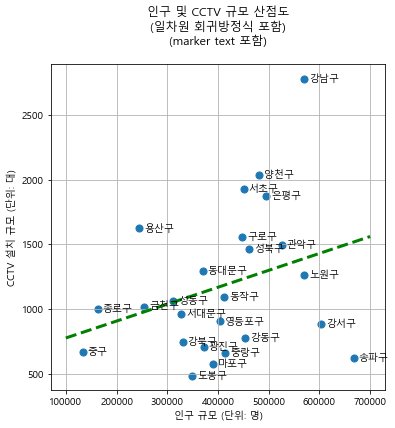

In [58]:
plt.figure(figsize=(6, 6))
# 산점도 그리기
plt.scatter(data_result['인구수'], data_result['CCTV 소계'], s=50)  # 산점도 플롯(s=size)
plt.plot(fx, fy(fx), ls='dashed', lw=3, color='g')                  # 추정선 플롯

# 마커 옆에 자치구 이름 출력
for n in range(len(data_result)):               # data_result 행 개수만큼 반복 -> 자치구의 개수만큼 루프를 돌림
    plt.text(data_result['인구수'][n] + 10000,  # 텍스트 위치 x (마커 위치 x보다 약간 오른쪽)
             data_result['CCTV 소계'][n] - 20,  # 텍스트 위치 y (마커 위치 y보다 약간 아래쪽)
             data_result.index[n],              # 텍스트 내용 (구 이름)
             fontsize=10)                       # 폰트 크기

plt.title('인구 및 CCTV 규모 산점도\n(일차원 회귀방정식 포함)\n(marker text 포함)\n')
plt.xlabel('인구 규모 (단위: 명)')
plt.ylabel('CCTV 설치 규모 (단위: 대)')
plt.grid()
plt.show()

### 회귀 추정오차 가시화

In [59]:
# pf = np.polyfit(data_result['인구수'],  # 추정에 사용할 x 좌표 값
#                 data_result['소계'],    # 추정에 사용할 y 좌표 값
#                 1)                     # 1차원(직선 형태) 다항식
# fy = np.poly1d()
# fx = np.linspace(100000, 700000, 100)

# 추정오차 = 절대값(실측치 - 추정치) 계산 및 열 삽입
data_result['오차'] = np.abs(
    data_result['CCTV 소계'] - fy(data_result['인구수'])
)

# 추정오차 역순으로 정렬하여 df_sort로 저장
df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,CCTV 소계,CCTV 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV 비율,오차
자치구,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


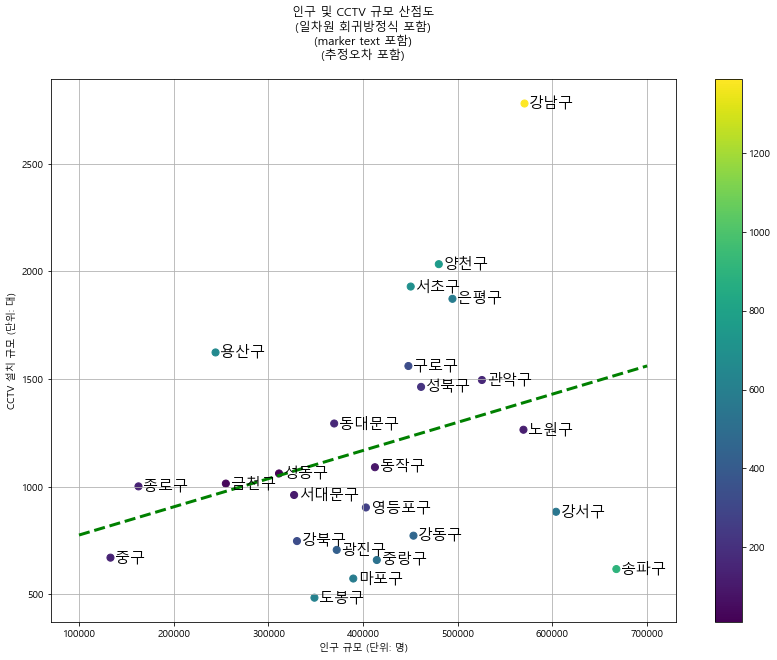

In [60]:
plt.figure(figsize=(14,10))

# 산점도 그리기
plt.scatter(df_sort['인구수'],     # x
            df_sort['CCTV 소계'],  # y
            c=df_sort['오차'],     # 마커 색상 (오차 데이터를 마커 색상으로 지정)
            s=50)                  # 마커 크기 

# 추세선 그리기
plt.plot(fx, fy(fx), ls='dashed', lw=3, color='g')

# 마커 옆에 구 이름 출력
for n in range(len(df_sort)):  # df_sort 행 개수만큼 반복
    plt.text(df_sort['인구수'][n] + 5000,  # 텍스트 위치 x (마커 위치 x보다 약간 오른쪽)
             df_sort['CCTV 소계'][n] - 20,      # 텍스트 위치 y (마커 위치 y보다 약간 아래쪽)
             df_sort.index[n],             # 텍스트 내용 (구 이름)
             fontsize=15)                  # 폰트 크기

plt.colorbar() # 색상 조견 막대 (수직 방향이 기본값)

plt.title('인구 및 CCTV 규모 산점도\n(일차원 회귀방정식 포함)\n(marker text 포함)\n(추정오차 포함)\n')    
plt.xlabel('인구 규모 (단위: 명)')
plt.ylabel('CCTV 설치 규모 (단위: 대)')
plt.grid()
plt.show()

* 강남구, 양천구, 서초구, 은평구, 용산구는 평균적 추세에 비하여 CCTV 설치 규모가 큰 지역
* 송파구, 도봉구, 마포구, 강서구, 중랑구는 평균적 추세에 비하여 CCTV 설치 규모가 작은 지역

## 도전 과제
- 지금까지 2017년 이전의 자료를 기준으로 분석한 결과
- 지금은 어떤 상황일까?
- 2017년과 2020년을 비교하면?
- 10년 동안 매해 같은 차트를 그리고, 상호작용적으로 만든다면?
- 참고 영상: 070117 'The best stats you've ever seen' by Hans Rosling  
  (비디오를 보려면 아래 이미지를 클릭! 유튜브 자막에서 한글을 선택하세요.)




[![Hans Rosling](https://img.youtube.com/vi/hVimVzgtD6w/hqdefault.jpg)](https://www.ted.com/talks/hans_rosling_the_best_stats_you_ve_ever_seen?utm_campaign=tedspread&utm_medium=referral&utm_source=tedcomsharet=300)

| 시점 | 내용 |
|:------:|:------|
| 4:45<br>~<br>4:50              | - 개발도상국이 선진국을 추격하는 동영상 시각화  <br>- 기간: 1962년~2003년<br>- x: 출산율<br>- y: 기대 수명<br>- bubble: 인구에 비례하는 크기의 국가<br><br>- 두 국가 그룹<br>    - 우측 하단: 개발도상국<br>    - 좌측 상단: 선진국                                |
| 5:00<br>~<br>5:45              | - (같은 차트에서) <br>- 베트남이 미국을 추격하는 동영상 시각화                                                                                                                                                                                                   |
| 6:15<br>~<br>6:53              | - 세계 소득 분배<br>- x: 일당(가장이 하루에 얻는 소득), 로그 스케일<br>- y: 확률 밀도<br><br>- 부유한 20%가 전체 소득의 74%를 점유<br>- 가난한 20%가 전체 소득의 &nbsp;&nbsp;2%를 점유<br>- 중간의 60%가 전체 소득의 24%를 점유                                               |
| 7:12<br> ~<br>8:15 | 2000년 대 1970년 비교<br>극빈층과 극부층의 비중에 주목<br> 50불 지점의 작은 봉우리에 주목<br>- 지역별 누적 확률분포도<br><br>1970년에는 아시아가 $10 미만에 소속 <br>1970년~2015년<br>2015년에는 오른쪽 작은 봉우리가 거의 사라짐                                  |
| 8:30<br>~<br>9:33              | - x: 가족 소득을 일인당 국민소득으로 변경<br>- bubble: 인구 비례하는 크기의 지역(8:48)<br>- y: 유아 생존율<br> <br><br>일인당 소득이 많을수록 유아 생존율이 높은 패턴<br>x 축은 로그 스케일, y 축은 왜곡 스케일                                                  |
| 9:35<br>~<br>11:23                 | 지역을 국가로 분해<br>- 아프리카: 시에라리온대 모리셔스<br>- 남아시아: 아프가니스탄 대 스리랑카 <br>- 아랍: 예멘 대 아랍에미레이트<br>- 동아시아: 캄보디아 대 싱가폴  <br>- 유럽: 타지키스탄 대 슬로베니아<br>- 중남미: 아이티 대 칠레<br>- OECD: 미국 대 스웨덴 |
| 11:24<br>~<br>12:03            | 1960~2003 전 세계의 이동                                                                                                                                                                                                                                         |
| 12:40<br>~<br>12:57            | 한국 대 브라질                                                                                                                                                                                                                                                   |
| 13:06<br>~<br>13:06           | 우간다 대 아랍에미레이트                                                                                                                                                                                                                                         |
| 14:19        | 우간다 5분위수<br>남아프리카 5분위수  <br>나이제리아 5분위수                                                                                                                                                                                                     |
| 15:38<br>16:05<br>16:30<br>17:00        | 데이터 활용이 미흡한 문제<br>gapminder.org<br>유엔 사무총장: "불가능하지는 않지만, 다만 할 수 없다."                                                                                                                                                             |
| 17:45<br>~<br>18:06            | 중국과 미국의 소득 분포 (1970년 대 )                                                                                                                                                                  |
| 19:05<br>~<br>19:31            | 1985~2003 소득 대비 인터넷 사용<br>x: 일인당 국민소득(왜곡된 눈금)<br>y: 천명당 인터넷 사용자 수(지수형 스케일)                                                                                                                                                  |